In [55]:
from importlib import reload
import cohort_model
import fitness_calculations
import figures
reload(figures)
reload(cohort_model)
reload(fitness_calculations)

<module 'fitness_calculations' from '/Users/oda/Dropbox/1 Prosjekt/risky_ageing/fitness_calculations.py'>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

import figures
from cohort_model import run_simulation, MUTANT_CAP, MUTANT_WILD, get_mean_and_std, population_survivorship_difference, HYP_WILD_TYPE

In [31]:
t_m_cap_f = 325
t_m_cap_m = 290
t_m_wild_f = 100
t_m_wild_m = 53

number_of_individuals = 1000
number_of_repetitions = 100
cohort = np.ones(number_of_individuals)

epsilon = 0.04

# The 8 parameters below are based on previous least-squares curve fitting (see paper for details)
alpha_f = 0.00287
kappa_f = 0.00842

alpha_m = 0.00057
kappa_m = 0.0173

hazard_rate_f = 0.0503 / (1 - epsilon)
hazard_rate_m = 0.0435 / (1 - epsilon)

omega = 0.0001
tau = 1.8 

In [3]:
# FEMALE CAPTIVITY
hazard_rate_parameters = dict(alpha=alpha_f, kappa=kappa_f)
captivity_f = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_cap_f, MUTANT_CAP)

In [4]:
# MALE CAPTIVITY
hazard_rate_parameters = dict(alpha=alpha_m, kappa=kappa_m)
captivity_m = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_cap_m, MUTANT_CAP)

In [5]:
# FEMALE WILD
hazard_rate_parameters = dict(alpha=alpha_f, kappa=kappa_f, epsilon=epsilon, hazard_rate_wild_type=hazard_rate_f)
wild_f = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_wild_f, MUTANT_WILD)

In [6]:
# MALE WILD
hazard_rate_parameters = dict(alpha=alpha_m, kappa=kappa_m, epsilon=epsilon, hazard_rate_wild_type=hazard_rate_m, omega=omega, tau=tau)
wild_m = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m_wild_m, MUTANT_WILD)

In [7]:
# NORMALIZE
mean_cap_f, _ = get_mean_and_std(captivity_f)
mean_cap_m, _ = get_mean_and_std(captivity_m)
mean_wild_f, _ = get_mean_and_std(wild_f)
mean_wild_m, _ = get_mean_and_std(wild_m)

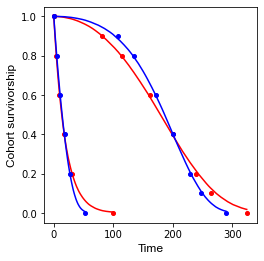

In [8]:
figures.plot_fig_4(t_m_cap_f, t_m_cap_m, t_m_wild_f, t_m_wild_m, mean_cap_f, mean_cap_m, mean_wild_f, mean_wild_m)

# Calculates areas under survivorship curves for mutant and hypothetical wild type

### Results reported in the paper

In [95]:
number_of_repetitions = 1000

In [118]:
%%time
# hazard_rate_parameters = dict(alpha=alpha_f, kappa=kappa_f)

# FEMALE
epsilons = np.array([0., 0.01, 0.02, 0.03, 0.04])
h_wt_f = np.array([0.0503, 0.0508, 0.0513, 0.05185, 0.05239]) # TODO: Avklar hva som skjer her og dokumenter

# No omega or tau for females
population_simulations_f, _, _ = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=h_wt_f,
    alpha=alpha_f,
    kappa=kappa_f,
    t_m=t_m_wild_f,
)

mutant_f = np.array(population_simulations_f[MUTANT_WILD])
hyp_wt_f = np.array(population_simulations_f[HYP_WILD_TYPE])



CPU times: user 2min 20s, sys: 1min 49s, total: 4min 9s
Wall time: 4min 10s


In [105]:
%%time
# MALE

h_wt_m = np.array([0.0435, 0.04393, 0.044387, 0.044845, 0.04531]) # TODO: Avklar hva som skjer her og dokumenter

population_simulations_m, _, _ = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=h_wt_m,
    alpha=alpha_m,
    kappa=kappa_m,
    t_m=t_m_wild_m,
    omega=omega,
    tau=tau
)

mutant_m = np.array(population_simulations_m[MUTANT_WILD])
hyp_wt_m = np.array(population_simulations_m[HYP_WILD_TYPE])

CPU times: user 50.1 s, sys: 27.7 s, total: 1min 17s
Wall time: 1min 18s


In [151]:
# Calculate the percentage of cases where the mutant has a larger area than the hypothetical wild type

# Female
area_mut_f = np.trapz(mutant_f)
area_hyp_wt_f = np.trapz(hyp_wt_f)
area_diff_f = np.subtract(area_mut_f, area_hyp_wt_f)
percentage_diff_f = np.sum(area_diff_f > 0, axis=1) / number_of_repetitions * 100

# Male
area_mut_m = np.trapz(mutant_m)
area_hyp_wt_m = np.trapz(hyp_wt_m)
area_diff_m = np.subtract(area_mut_m, area_hyp_wt_m)
percentage_diff_m = np.sum(area_diff_m > 0, axis=1) / number_of_repetitions * 100

In [158]:
print(f"Female, wild mutant wins {[float(x) for x in percentage_diff_f]} percent of the time at epsilon values of {[float(num) for num in epsilons]}, respectively.\n")
print(f"Male, wild mutant wins {[float(x) for x in percentage_diff_m]} percent of the time at epsilon values of {[float(num) for num in epsilons]}, respectively.")

Female, wild mutant wins [0.0, 40.0, 99.6, 100.0, 100.0] percent of the time at epsilon values of [0.0, 0.01, 0.02, 0.03, 0.04], respectively.

Male, wild mutant wins [0.0, 98.6, 100.0, 100.0, 100.0] percent of the time at epsilon values of [0.0, 0.01, 0.02, 0.03, 0.04], respectively.
